In [1]:
import pandas as pd
import matplotlib.pyplot as plt  # plot
import os
from os.path import join

path = ('/kaggle/input/affectnet-training-data/')
file = (path + 'labels.csv')
df = pd.read_csv(file)
df.head()

,Unnamed: 0,pth,label,relFCs
0,0,anger/image0000006.jpg,surprise,0.873142
1,1,anger/image0000060.jpg,anger,0.852311
2,2,anger/image0000061.jpg,anger,0.800957
3,3,anger/image0000066.jpg,disgust,0.843079
4,4,anger/image0000106.jpg,anger,0.849108


In [2]:
df.describe()

,Unnamed: 0,relFCs
count,28175.000000,28175.000000
mean,14087.000000,0.799247
std,8133.566253,0.058755
min,0.000000,0.516357
25%,7043.500000,0.766363
50%,14087.000000,0.809000
75%,21130.500000,0.842068
max,28174.000000,0.899951


In [3]:
df.hist

<bound method hist_frame of        Unnamed: 0                        pth     label    relFCs
0               0     anger/image0000006.jpg  surprise  0.873142
1               1     anger/image0000060.jpg     anger  0.852311
2               2     anger/image0000061.jpg     anger  0.800957
3               3     anger/image0000066.jpg   disgust  0.843079
4               4     anger/image0000106.jpg     anger  0.849108
...           ...                        ...       ...       ...
28170       28170  surprise/image0034960.jpg  surprise  0.825263
28171       28171  surprise/image0034961.jpg  surprise  0.738646
28172       28172  surprise/image0034966.jpg  surprise  0.774524
28173       28173  surprise/image0034973.jpg   neutral  0.766952
28174       28174  surprise/image0042075.jpg   disgust  0.832160

[28175 rows x 4 columns]>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28175 entries, 0 to 28174
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  28175 non-null  int64  
 1   pth         28175 non-null  object 
 2   label       28175 non-null  object 
 3   relFCs      28175 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 880.6+ KB


In [5]:
import os
# Define an empty list
file_counts = []
def countFile(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    file_counts.append(num_files)
    print(f"Number of files in directory {link} is ", num_files)

In [6]:
countFile("/kaggle/input/affectnet-training-data/happy")
countFile("/kaggle/input/affectnet-training-data/sad")
countFile("/kaggle/input/affectnet-training-data/surprise")
countFile("/kaggle/input/affectnet-training-data/anger")
countFile("/kaggle/input/affectnet-training-data/disgust")
countFile("/kaggle/input/affectnet-training-data/contempt")
countFile("/kaggle/input/affectnet-training-data/fear")
countFile("/kaggle/input/affectnet-training-data/neutral")

Number of files in directory /kaggle/input/affectnet-training-data/happy is  5044
Number of files in directory /kaggle/input/affectnet-training-data/sad is  3091
Number of files in directory /kaggle/input/affectnet-training-data/surprise is  4039
Number of files in directory /kaggle/input/affectnet-training-data/anger is  3218
Number of files in directory /kaggle/input/affectnet-training-data/disgust is  2477
Number of files in directory /kaggle/input/affectnet-training-data/contempt is  2871
Number of files in directory /kaggle/input/affectnet-training-data/fear is  3176
Number of files in directory /kaggle/input/affectnet-training-data/neutral is  5126


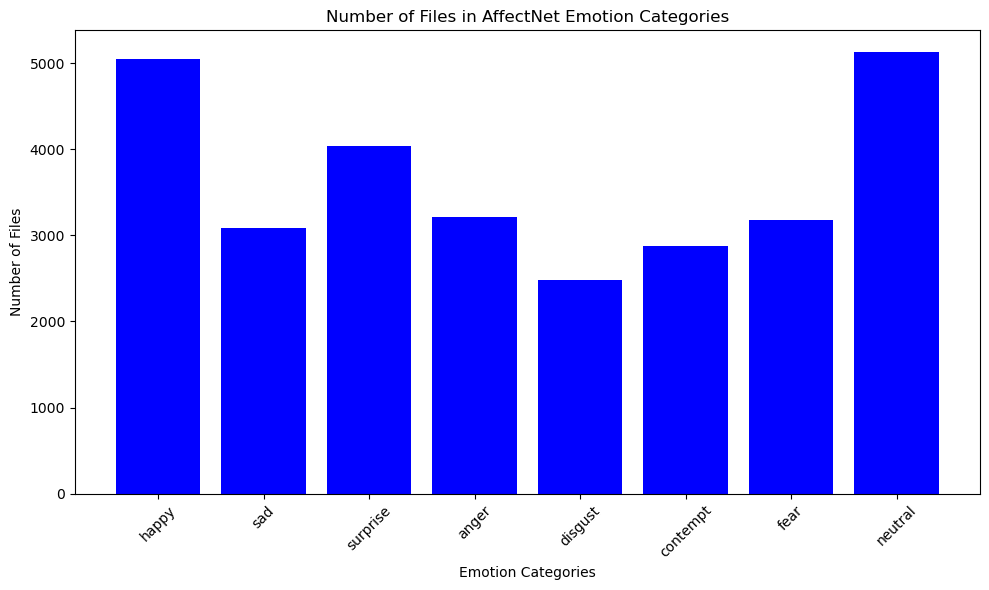

In [7]:
import matplotlib.pyplot as plt

# Data
categories = ['happy', 'sad', 'surprise', 'anger', 'disgust', 'contempt', 'fear', 'neutral']

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, file_counts, color='blue')
plt.xlabel('Emotion Categories')
plt.ylabel('Number of Files')
plt.title('Number of Files in AffectNet Emotion Categories')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

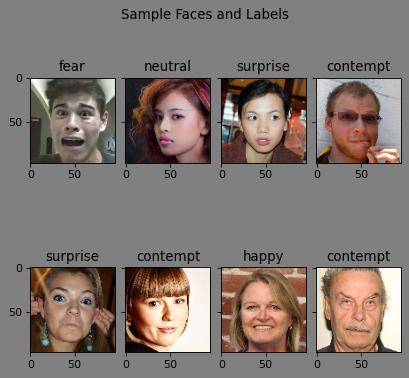

In [8]:
# display random images
import random
import cv2

fig, axs = plt.subplots(2, 4, sharey=True, constrained_layout=True, num=None, 
                        figsize=(5, 5), dpi=80, facecolor='gray', edgecolor='k')
fig.suptitle("Sample Faces and Labels")
axs = axs.flatten()

for i in range(8):
    idx = random.randint(0, len(df)-1)  # randomly select an index
    img_path = path + df['pth'][idx]
    img = cv2.imread(img_path)  # read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to BGR to RGB
    axs[i].imshow(img)
    axs[i].set_title(df['label'][idx])

In [9]:
# how many emotions categories

import os

INPUT_PATH = "/kaggle/input/affectnet-training-data/"
EMOTIONS = [f.name for f in os.scandir(INPUT_PATH) if f.is_dir()]
IMAGE_SIZE = (96, 96)

print(EMOTIONS)

['surprise', 'fear', 'neutral', 'sad', 'disgust', 'contempt', 'happy', 'anger']


In [10]:
# define functions to pre-process and load images into arrays

import cv2
import numpy as np
from keras.utils import to_categorical
import os

def image_generator(input_path, emotions, image_size):
    for index, emotion in enumerate(emotions):
        for filename in os.listdir(os.path.join(input_path, emotion)):
            img = cv2.imread(os.path.join(input_path, emotion, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            #img = cv2.resize(img, image_size)
            #img = img.astype('float32') / 255.0  # Normilize
            yield img, index

def load_images(input_path, emotions, image_size):
    X, y = [], []
    for img, label in image_generator(input_path, emotions, image_size):
        X.append(img)
        y.append(label)
    X = np.array(X)
    y = to_categorical(np.array(y))
    return X, y

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [11]:
# Load the images
X, y = load_images(INPUT_PATH, EMOTIONS, IMAGE_SIZE)
input_shape = X[0].shape
#input_shape = (96,96,1) 

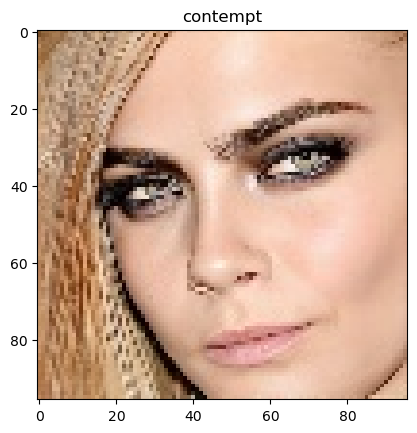

In [12]:
import matplotlib.pyplot as plt

# choose a random image index
idx = np.random.randint(len(X))

# display the image and its corresponding label from arrays
plt.imshow(X[idx])
plt.title(EMOTIONS[np.argmax(y[idx])])
plt.show()

In [13]:
# Train test split pre-processed data

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPool2D
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

model_4 = Sequential()

model_4.add(Conv2D(32, (3,3), activation="selu", input_shape=input_shape))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(pool_size=(2,2)))
model_4.add(Dropout(0.3))

model_4.add(Conv2D(64, (3,3), activation="selu"))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, (3,3), activation="selu"))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(pool_size=(2,2)))
model_4.add(Dropout(0.4))

model_4.add(Conv2D(128, (3,3), activation="selu"))
model_4.add(BatchNormalization())
model_4.add(Conv2D(128, (3,3), activation="selu"))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(pool_size=(2,2)))
model_4.add(Dropout(0.5))

model_4.add(Conv2D(256, (3,3), activation="selu"))
model_4.add(BatchNormalization())
model_4.add(Conv2D(256, (3,3), activation="selu"))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(pool_size=(2,2)))
model_4.add(Dropout(0.6))

model_4.add(Flatten())
model_4.add(Dense(128, activation='selu', kernel_regularizer=l2(0.01)))
model_4.add(BatchNormalization())
model_4.add(Dropout(0.5))
model_4.add(Dense(8, activation='softmax'))

model_4.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 94, 94, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 47, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 45, 45, 64)       2

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

history = model_4.fit(X_train, y_train, batch_size=128,
                    epochs=30,
                    validation_data=(X_test, y_test),
                    
                    callbacks = [EarlyStopping(patience=10, monitor='val_loss', mode='min'), 
                                 ReduceLROnPlateau(monitor='val_loss', 
                                                   factor=0.5, 
                                                   patience=2, 
                                                   verbose=1),
                                 ModelCheckpoint('best_model.h5', 
                                                 save_best_only=True, 
                                                 save_weights_only=True, 
                                                 monitor='val_accuracy', 
                                                 mode='max')],
                    verbose=1)

Epoch 1/30
182/182 [==============================] - 684s 4s/step - loss: 3.6771 - accuracy: 0.3304 - val_loss: 2.6443 - val_accuracy: 0.4619 - lr: 0.0010
Epoch 2/30
182/182 [==============================] - 680s 4s/step - loss: 2.1639 - accuracy: 0.4568 - val_loss: 1.6459 - val_accuracy: 0.5252 - lr: 0.0010
Epoch 3/30
128/182 [====================>.........] - ETA: 3:09 - loss: 1.5968 - accuracy: 0.5124

In [ ]:
pd.DataFrame(history.history).plot();

In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    

    plt.show()
    

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
              )

In [ ]:
# calculates the false positive rate, true positive rate, and AUC score

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions
y_pred = model_4.predict(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC score
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = roc_auc_score(y_test, y_pred, multi_class='ovr')

# Plot the ROC curves for each class and the micro-average ROC curve
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr["micro"], tpr["micro"], lw=lw, label='micro-average ROC curve (AUC = {0:0.2f})'
                                                   ''.format(roc_auc["micro"]))
colors = ['cornflowerblue', 'darkorange', 'forestgreen', 'red', 'purple', 'gray', 'black', 'pink']
for i, color in zip(range(8), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (AUC = {1:0.2f})'.format(EMOTIONS[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [ ]:
# Compute classification report

from sklearn.metrics import classification_report

# Convert one-hot encoded y_test back to integers
y_test_int = np.argmax(y_test, axis=1)

# Make predictions
y_pred = model_4.predict(X_test)

# Convert one-hot encoded y_pred back to integers
y_pred_int = np.argmax(y_pred, axis=1)

# Generate classification report
print(classification_report(y_test_int, y_pred_int))

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test_int, y_pred_int)
sns.heatmap(cm, annot=True)
plt.show()

In [ ]:
# save the model
model_4.save('/kaggle/working/model_4.h5')

In [ ]:
!pip install mtcnn

In [ ]:
# now let's modify our function to draw the emotion probability out of all 8 emotions
from mtcnn import MTCNN

import cv2

def detect_faces_emo(image_path, detection_confidence=0.99, min_face_size=10):
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Create an MTCNN detector instance
    detector = MTCNN()

    # Use the detector to detect faces in the image
    faces = detector.detect_faces(image)

    # Loop over the detected faces
    for face in faces:
        # Check the confidence score of the detection
        if face['confidence'] < detection_confidence:
            continue
        # Extract the bounding box coordinates
        x, y, width, height = face['box']
        # Check the size of the bounding box
        if min(width, height) < min_face_size:
            continue
        
        # Extract the face region from the image
        face_image = image[y:y+height, x:x+width]
        # Resize the face image to 96x96
        face_image_resized = cv2.resize(face_image, (96, 96))
        # Reshape the face image to match the input shape of the model
        face_image_reshaped = face_image_resized.reshape((1, 96, 96, 3))
        # Use the model to predict the emotion of the face
        predicted_emo = model_4.predict(face_image_reshaped)[0]
        predicted_emo_sorted = sorted(list(enumerate(predicted_emo)), key=lambda x: x[1], reverse=True)
        
        # Extract the predicted probabilities for each emotion category
        # Extract the predicted probabilities for each emotion category
        probabilities = ["{}".format(round(prob * 100)) for index, prob in predicted_emo_sorted]
        
        # Draw the predicted emotion label on the rectangle around the face
        label = EMOTIONS[np.argmax(predicted_emo)]
        cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.8, (0, 255, 0), 3)
        
        # Draw a square rectangle around the face
        face_size = min(width, height)
        x_center = x + int(width / 2)
        y_center = y + int(height / 2)
        x1 = x_center - int(face_size / 2)
        y1 = y_center - int(face_size / 2)
        x2 = x_center + int(face_size / 2)
        y2 = y_center + int(face_size / 2)
        cv2.rectangle(image, (x1, y1), (x2, y2), (127, 255, 0), 2)

        # Draw a vertical table with the predicted emotion probabilities
        table_x, table_y = x1, y2 + 20
        for index, prob in predicted_emo_sorted:
            table_y += 40
            emotion = EMOTIONS[index]
            cv2.putText(image, emotion, (table_x, table_y), cv2.FONT_HERSHEY_SIMPLEX, 1.6, (255, 255, 255), 3)
            cv2.putText(image, "{}%".format(round(prob * 100)), (table_x + 250, table_y), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (255, 255, 255), 3)
    
    # Save the image with the detected faces and predicted emotions to a file
    cv2.imwrite("detected_faces.jpg", image)

    # Return the path to the saved file
    return "detected_faces.jpg"

In [ ]:
from IPython.display import Image
# Detect faces in the new image of my friends and save the result to a file
image_path = detect_faces_emo('/kaggle/input/caffe-model/face-detection-caffee-main/face-detection-caffee-main/media/sample9.jpg')
# Display the saved image
Image(filename=image_path)

In [ ]:
from IPython.display import Image
# Detect faces in the new image of my friends and save the result to a file
image_path = detect_faces_emo('/kaggle/input/caffe-model/face-detection-caffee-main/face-detection-caffee-main/media/sample2.jpg')
# Display the saved image
Image(filename=image_path)

In [ ]:
from IPython.display import Image
# Detect faces in the new image of my friends and save the result to a file
image_path = detect_faces_emo('/kaggle/input/caffe-model/face-detection-caffee-main/face-detection-caffee-main/media/sample3.jpg')
# Display the saved image
Image(filename=image_path)

In [ ]:
from IPython.display import Image
# Detect faces in the new image of my friends and save the result to a file
image_path = detect_faces_emo('/kaggle/input/caffe-model/face-detection-caffee-main/face-detection-caffee-main/media/sample4.jpg')
# Display the saved image
Image(filename=image_path)

In [ ]:
from IPython.display import Image
# Detect faces in the new image of my friends and save the result to a file
image_path = detect_faces_emo('/kaggle/input/caffe-model/face-detection-caffee-main/face-detection-caffee-main/media/sample5.jpg')
# Display the saved image
Image(filename=image_path)